# 신경망 모델

- 이진 분류
- 사용 데이터: 유방암 예측 사례

In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## 0. 데이터 준비

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
# shape 확인
df.shape

(569, 31)

## 1. 데이터를 정규/표준화 하지 않은 경우

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target,
    test_size=0.2, random_state=2022
)

### 1) 모델 정의

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # Fully Connected Network (input~output 전부 연결 )

In [10]:
model = Sequential([
                    Dense(100, input_shape=(30,), activation='relu'),
                    Dense(24, activation='relu'),
                    Dense(1, activation='sigmoid')   
])
# 현제 데이터 개수:30
# Dense: 내가 원하는 만큼 설정
  # -> input_shape
  # -> activation = '사용하고자 하는 활성화 함수'
# 100개 -> 24개 -> 1개

In [11]:
model.summary()
# Param: 결정 파라미더 개수 (원본 데이터 개수*반복 횟수 + bias 개수)
  # 3100 = 30 * 100 + 100
  # 2424 = 100 * 24 + 24 
  # 25 = 24 * 1 + 1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 24)                2424      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


### 2) 모델 설정 (컴파일)

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# 오타 안나게 잘 입력해야해,,,,,

### 3) 모델 학습

In [24]:
history = model.fit(X_train, y_train, validation_split = 0.2,
          epochs=100, batch_size=100)
# validation_split: 학습데이터에서 검증을 위한 데이터를 분리 


Epoch 1/100
4/4 [==============================] - 0s 40ms/step - loss: 0.2620 - accuracy: 0.9176 - val_loss: 0.5286 - val_accuracy: 0.8462
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.2913 - accuracy: 0.9093 - val_loss: 0.3750 - val_accuracy: 0.9231
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 0.2403 - accuracy: 0.9176 - val_loss: 0.3962 - val_accuracy: 0.8901
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: 0.2371 - accuracy: 0.9258 - val_loss: 0.3124 - val_accuracy: 0.9121
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 0.2274 - accuracy: 0.9203 - val_loss: 0.3051 - val_accuracy: 0.9121
Epoch 6/100
4/4 [==============================] - 0s 24ms/step - loss: 0.2428 - accuracy: 0.9313 - val_loss: 0.4286 - val_accuracy: 0.8681
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 0.2307 - accuracy: 0.9093 - val_loss: 0.4607 - val_accuracy: 0.9121
Epoch 8/100
4/4 [===

### 4) 모델 평가

In [20]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.5535 - accuracy: 0.8947


[0.5534579753875732, 0.8947368264198303]

### 훈련 과정 시각화
- epoch에 따른 accuracy, val_loss 변화

In [38]:
y_acc = history.history['accuracy']
y_loss = history.history['val_loss']

xs = np.arange(1, len(y_acc)+1)

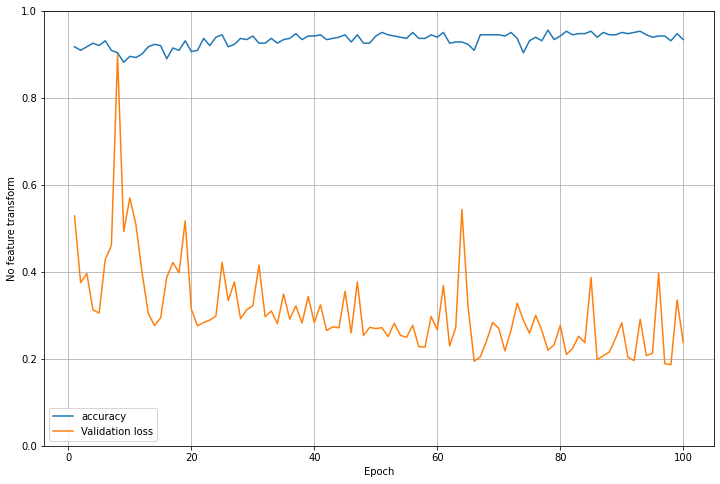

In [56]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='accuracy')
plt.plot(xs, y_loss, label='Validation loss')
plt.legend(), plt.grid()
plt.xlabel('Epoch')
plt.ylabel('No feature transform')
plt.ylim([0, 1])
plt.show()

## 1. 데이터를 `정규/표준화`한 경우

In [42]:
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)

In [69]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target,
    test_size=0.2, random_state=2022
)

#### 모델 정의

In [70]:
model2 = Sequential([
                    Dense(100, input_shape=(30,), activation='relu'),
                    Dense(24, activation='relu'),
                    Dense(1, activation='sigmoid')   
])

In [60]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               3100      
                                                                 
 dense_13 (Dense)            (None, 24)                2424      
                                                                 
 dense_14 (Dense)            (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


In [61]:
## 다른 방법 
model2 = Sequential()
model2.add(Dense(100, input_shape=(30,), activation='relu'))
model2.add(Dense(24, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [62]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               3100      
                                                                 
 dense_16 (Dense)            (None, 24)                2424      
                                                                 
 dense_17 (Dense)            (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


#### 모델 설정 

In [63]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# 오타 안나게 잘 입력해야해,,,,,

#### 모델 학습

In [64]:
hist2 = model2.fit(X_train2, y_train2, validation_split=0.2,
                   epochs=100, batch_size=100)

Epoch 1/100
4/4 [==============================] - 1s 55ms/step - loss: 115.1881 - accuracy: 0.6209 - val_loss: 71.4370 - val_accuracy: 0.6484
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 66.7256 - accuracy: 0.6209 - val_loss: 36.1817 - val_accuracy: 0.6484
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 29.2979 - accuracy: 0.6209 - val_loss: 11.1140 - val_accuracy: 0.6484
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 6.8851 - accuracy: 0.6566 - val_loss: 2.0306 - val_accuracy: 0.3407
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 4.4503 - accuracy: 0.3736 - val_loss: 7.7630 - val_accuracy: 0.3516
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 7.5209 - accuracy: 0.3791 - val_loss: 7.1611 - val_accuracy: 0.3516
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 5.6410 - accuracy: 0.3791 - val_loss: 2.6390 - val_accuracy: 0.3736
Epoch 8/100
4

In [67]:
model2.evaluate(X_test2, y_test2)

4/4 [==============================] - 0s 3ms/step - loss: 0.2490 - accuracy: 0.9035


[0.2489766925573349, 0.9035087823867798]

#### 훈련 과정 시각화

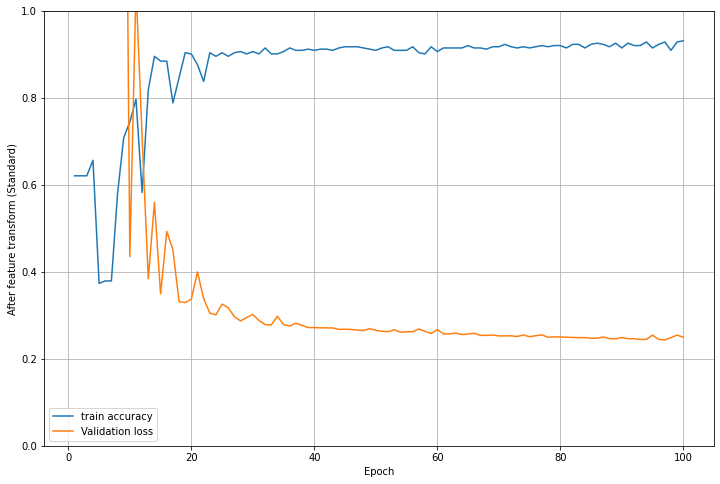

In [68]:
y_acc2 = hist2.history['accuracy']
y_loss2 = hist2.history['val_loss']

xs = np.arange(1, len(y_acc2)+1)

########
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc2, label='train accuracy')
plt.plot(xs, y_loss2, label='Validation loss')
plt.legend(), plt.grid()
plt.xlabel('Epoch')
plt.ylabel('After feature transform (Standard)')
plt.ylim([0, 1])
plt.show()